In [1]:
%config Completer.use_jedi = False

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date

from sklearn.model_selection import train_test_split

In [3]:
df_diabetes = pd.read_csv("data/diabetes.csv")
df_patient = pd.read_csv("data/patient_data.csv")
df_pregnancies = pd.read_csv("data/pregnancies_records.csv")

In [4]:
pregnancies_sum = df_pregnancies.groupby("PatientID", as_index=False).agg({"PregnancyRecordID": "count"})
pregnancies_sum.columns=["PatientID", "PregnanciesCount"]

In [5]:
combined = pd.merge(pd.merge(df_diabetes, df_patient, on="PatientID", how="left"), pregnancies_sum, on="PatientID", how="left")

In [6]:
combined.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome,BirthYear,City,State,Country,PregnanciesCount
0,101,58,17,265,24.2,0.614,1017,0,1998,Winona,Minnesota,United States,2.0
1,108,70,0,0,30.5,0.955,1031,1,1988,Springfield,Illinois,United States,8.0
2,148,60,27,318,30.9,0.150,1033,1,1992,Socorro,Texas,United States,4.0
3,113,76,0,0,33.3,0.278,1035,1,1998,Erie,Pennsylvania,United States,NaN
4,83,86,19,0,29.3,0.317,1048,0,1987,Sioux Falls,South Dakota,United States,4.0


In [8]:
year = date.today().year
print(f"year={year}")
combined['Age']=year-combined['BirthYear']
combined.head()

year=2021


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome,BirthYear,City,State,Country,PregnanciesCount,Age
0,101,58,17,265,24.2,0.614,1017,0,1998,Winona,Minnesota,United States,2.0,23
1,108,70,0,0,30.5,0.955,1031,1,1988,Springfield,Illinois,United States,8.0,33
2,148,60,27,318,30.9,0.150,1033,1,1992,Socorro,Texas,United States,4.0,29
3,113,76,0,0,33.3,0.278,1035,1,1998,Erie,Pennsylvania,United States,NaN,23
4,83,86,19,0,29.3,0.317,1048,0,1987,Sioux Falls,South Dakota,United States,4.0,34


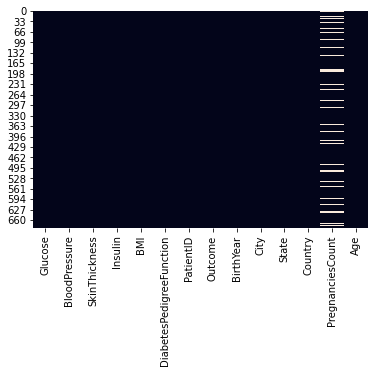

In [9]:
sns.heatmap(combined.isnull(), cbar=False)

In [10]:
combined["PregnanciesCount"].fillna(0, inplace=True)

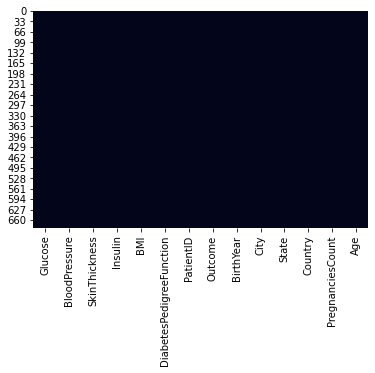

In [11]:
sns.heatmap(combined.isnull(), cbar=False)

In [12]:
X = combined.drop(columns=["Outcome"])
y = combined.Outcome

In [13]:
print(f"X shape={X.shape}")
print(f"y shape={y.shape}")

X shape=(686, 13)
y shape=(686,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [18]:
print(f"X_train shape={X_train.shape}")
print(f"y_train shape={y_train.shape}")
print(f"X_test shape={X_test.shape}")
print(f"y_test shape={y_test.shape}")

X_train shape=(548, 13)
y_train shape=(548,)
X_test shape=(138, 13)
y_test shape=(138,)
